In [63]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
#Load Data
Asthma_Diagnosis = pd.read_csv('asthma_disease_data.csv')


In [67]:
#Display the first 5 rows of the data
Asthma_Diagnosis.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [69]:
Asthma_Diagnosis['Diagnosis'].value_counts()

Diagnosis
0    2268
1     124
Name: count, dtype: int64

In [71]:
#Check the uniqueness of the Column, doctor in charge
Asthma_Diagnosis['DoctorInCharge'].unique()

array(['Dr_Confid'], dtype=object)

In [73]:
#Check columns information
Asthma_Diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [75]:
#Generate summary statistics column by column 
Asthma_Diagnosis.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
#Drop irrelevant columns
Asthma_Diagnosis = Asthma_Diagnosis.drop(columns=['PatientID','Diagnosis', 'DoctorInCharge'], axis=1)

In [80]:
#Print out the new data after dropping the
Asthma_Diagnosis

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,0,1.369051,4.941206,0,0,1,0,0,1
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,0,2.197767,1.702393,1,0,0,1,1,1
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1,0,1.698011,5.022553,1,1,1,0,1,1
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,1,0,3.032037,2.300159,1,0,1,1,1,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,1,0,3.470589,3.067944,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,0,0,3.125249,5.166032,0,1,0,0,0,1
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,...,0,0,1.132977,5.509502,0,0,0,1,1,0
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,...,1,0,1.685962,3.346877,1,0,1,1,0,1
2390,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,...,0,1,3.481549,1.713274,0,1,1,0,1,1


In [82]:
#Drop missing values
Asthma_Diagnosis = Asthma_Diagnosis.dropna()

In [84]:
#Scaling the data 
scaler= StandardScaler()
scaled_data = scaler.fit_transform(Asthma_Diagnosis)
print(scaled_data)

[[ 0.9657396  -0.98671037  0.33498607 ... -1.00671148 -1.23095374
   0.80813076]
 [-0.74705382  1.01346862  1.34927301 ...  0.99333326  0.81237821
   0.80813076]
 [ 0.68798931 -0.98671037  1.34927301 ... -1.00671148  0.81237821
   0.80813076]
 ...
 [ 0.54911417 -0.98671037  2.36355994 ...  0.99333326 -1.23095374
   0.80813076]
 [ 0.17878046  1.01346862 -0.67930087 ... -1.00671148  0.81237821
   0.80813076]
 [-0.74705382  1.01346862 -0.67930087 ... -1.00671148  0.81237821
  -1.23742351]]


In [86]:
#Print the shape of the scaled data
scaled_data.shape

(2392, 26)

In [88]:
#Converting Scaled_data into DataFrame
scaled_df = pd.DataFrame(scaled_data)
scaled_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.965740,-0.986710,0.334986,-1.455673,-1.582769,-0.406355,-1.432099,0.160113,0.971063,0.809355,...,-0.58250,-0.433228,-1.368934,0.920608,-1.214986,-1.000836,0.993333,-1.006711,-1.230954,0.808131
1,-0.747054,1.013469,1.349273,0.771363,-0.623300,-0.406355,0.291269,0.453069,-1.076746,-1.036866,...,-0.58250,-0.433228,-0.407132,-1.564256,0.823055,-1.000836,-1.006711,0.993333,0.812378,0.808131
2,0.687989,-0.986710,1.349273,-0.342155,-1.229074,-0.406355,0.581330,1.434458,-0.102976,-1.210374,...,1.71674,-0.433228,-0.987146,0.983019,0.823055,0.999164,0.993333,-1.006711,0.812378,0.808131
3,-0.098970,1.013469,1.349273,-0.342155,1.565307,-0.406355,-1.256398,0.276233,-1.596880,-1.509757,...,1.71674,-0.433228,0.561114,-1.105641,0.823055,-1.000836,0.993333,0.993333,0.812378,-1.237424
4,0.873156,-0.986710,-0.679301,1.884880,-1.105686,-0.406355,-0.154081,-0.651625,1.504976,-1.373822,...,1.71674,-0.433228,1.070095,-0.516586,0.823055,0.999164,0.993333,-1.006711,-1.230954,0.808131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,0.039905,1.013469,-0.679301,0.771363,0.252042,-0.406355,-0.699950,0.376978,0.740107,-0.861740,...,-0.58250,-0.433228,0.669296,1.093099,-1.214986,0.999164,-1.006711,-1.006711,-1.230954,0.808131
2388,-1.117388,1.013469,-0.679301,-0.342155,-0.903322,-0.406355,0.259526,-0.218561,0.411163,0.927074,...,-0.58250,-0.433228,-1.642920,1.356614,-1.214986,-1.000836,-1.006711,0.993333,0.812378,-1.237424
2389,0.549114,-0.986710,2.363560,0.771363,1.365905,-0.406355,-0.109067,1.096868,0.268175,-0.755772,...,1.71674,-0.433228,-1.001130,-0.302584,0.823055,-1.000836,0.993333,0.993333,-1.230954,0.808131
2390,0.178780,1.013469,-0.679301,0.771363,-0.527792,-0.406355,1.591768,0.804295,-0.174204,1.511361,...,-0.58250,2.308255,1.082816,-1.555908,-1.214986,0.999164,0.993333,-1.006711,0.812378,0.808131


In [110]:
#Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

#Create a DataFrame for the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,0.890390,1.445235
1,-0.636807,-0.676467
2,-1.098412,-0.345644
3,-1.481745,-0.871247
4,-0.650832,0.041850
...,...,...
2387,0.804670,1.554626
2388,0.958180,-0.335930
2389,-2.130163,0.186505
2390,-0.027563,-1.355675


In [118]:
#Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_data)

#Add the cluster labels to the DataFrame
pca_df['cluster'] = kmeans.labels_
pca_df['cluster']

0       4
1       3
2       0
3       0
4       0
       ..
2387    4
2388    2
2389    0
2390    3
2391    3
Name: cluster, Length: 2392, dtype: int32

In [122]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC1      2392 non-null   float64
 1   PC2      2392 non-null   float64
 2   cluster  2392 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 46.8 KB


In [134]:
pca_df['cluster'].value_counts()

cluster
3    671
0    453
4    446
1    439
2    383
Name: count, dtype: int64

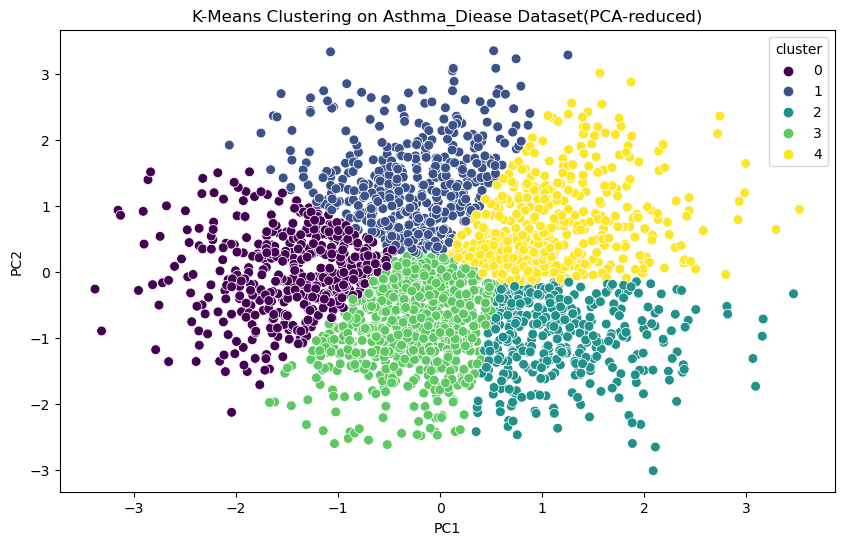

In [136]:
#Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=50)
plt.title('K-Means Clustering on Asthma_Diease Dataset(PCA-reduced)')
plt.show()

In [146]:
#Confusion Matrix
conf_matrix = confusion_matrix(pca_df['cluster'], kmeans.labels_)
print('Confusion Matrix:')
print(conf_matrix)

#Classification Report
report = classification_report(pca_df['cluster'], kmeans.labels_)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[  0   0 178  42   0   0   0   0  88   0   0  18   0   0 127]
 [  0   0   2 131  19 139   0   0   1   0   0   0 147   0   0]
 [ 12   0   0   0   0   0  62 171   0  62  19   0   0  57   0]
 [  0 216 101   0   0   0   0   0   0 144   0 118  22  70   0]
 [179   0   0   0 117   0   0   0   0  23  76   0  51   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]

Classification Report:
            

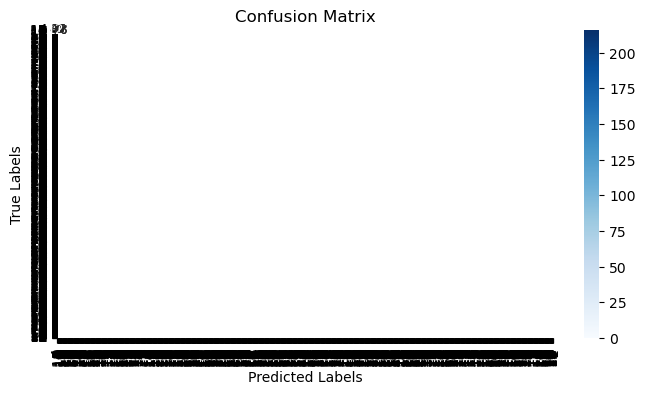

In [148]:
#Visualize confusion matrix
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix, annot= True, fmt='d', cmap='Blues', xticklabels=kmeans.labels_, yticklabels=kmeans.labels_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [158]:
#Sihouette Score Calculation
silhouette_scores =[]
cluster_range = range(2,16)
for n in cluster_range:
    kmeans = KMeans(n_clusters=n, random_state=42, n_init='auto')
    kmeans_labels = kmeans.fit_predict(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, kmeans_labels))

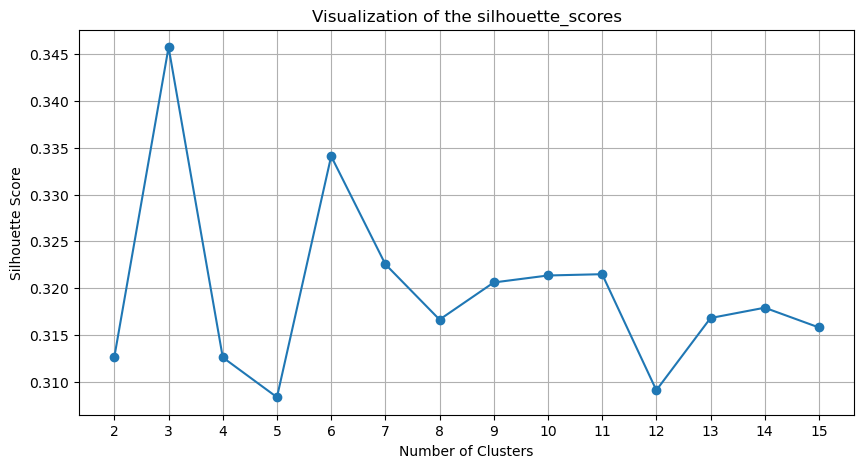

In [159]:
#Visualize the silhouette_score
plt.figure(figsize=(10,5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Visualization of the silhouette_scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2,16,step=1))
plt.grid(True)
plt.show()

In [201]:
#find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("optimal number of clusters",optimal_clusters)

optimal number of clusters 3


In [205]:
kmeans =KMeans(n_clusters = optimal_clusters, random_state=42, n_init='auto')
kmeans_labels_ =kmeans.fit_predict(pca_data)
score = silhouette_score(pca_data, kmeans_labels_)
print('Silhouette_score:', score)

Silhouette_score: 0.34807941459726527


In [209]:
#Using DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data)

#Using Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
labels = agglomerative.fit_predict(scaled_data)